# Collaborative filtering using a neural network

Start by using code from https://python.plainenglish.io/collaborative-filtering-recommendation-system-using-tensorflow-with-neural-net-7f8dba4521da and see if can get something similar working for our data and then progress from there

### Install and import Neccessary Libraries

In [8]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install tensorflow


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

### Import our Testing and Training split

I'll focus on just the global split for now and do comparison later.

In [10]:
global_train_df = pd.read_csv('../Katherine W/global_train_df.csv')
global_train_df.head()

,User ID,Item ID,Rating,timestamp,Age,Gender,Occupation,zip code,Movie Title,Release Date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,864,1044,3,888891049,27,M,programmer,63021,"Paper, The (1994)",01-Jan-1994,...,0,0.0,0,0,0.0,0,0,0.0,0,0
1,864,159,4,888891049,27,M,programmer,63021,Basic Instinct (1992),01-Jan-1992,...,0,0.0,0,0,1.0,0,0,1.0,0,0
2,864,1303,2,888890997,27,M,programmer,63021,"Getaway, The (1994)",01-Jan-1994,...,0,0.0,0,0,0.0,0,0,0.0,0,0
3,864,184,4,888890775,27,M,programmer,63021,Army of Darkness (1993),01-Jan-1993,...,0,0.0,1,0,0.0,0,1,0.0,0,0
4,864,1531,3,888890690,27,M,programmer,63021,Far From Home: The Adventures of Yellow Dog (1...,01-Jan-1995,...,0,0.0,0,0,0.0,0,0,0.0,0,0


In [11]:
# Get the number of unique users and items
n_users = global_train_df['User ID'].nunique()
n_tourisms = global_train_df['Item ID'].nunique()

# creating item embedding path
item_input = Input(shape=[1], name="Item-Input")
item_embedding = Embedding(n_tourisms + 1, 5, name="Item-Embedding")(item_input)
item_vec = Flatten(name="Flatten-Item")(item_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users + 1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-User")(user_embedding)

# concatenate features
conc = Concatenate()([item_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(256, activation='relu')(conc)
fc2 = Dense(128, activation='relu')(fc1)
fc3 = Dense(128, activation='relu')(fc2)
out = Dense(1)(fc3)

# Create model and compile it
model = Model([user_input, item_input], out)
model.compile('adam', 'mean_squared_error')

In [12]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Item-Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User-Input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Item-Embedding      │ (None, 1, 5)      │      2,815 │ Item-Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ User-Embedding      │ (None, 1, 5)      │      3,700 │ User-Input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Flatten-Item        │ (None, 5)         │          0 │ Item-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Flatten-User        │ (None, 5)         │          0 │ User-Embedding[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 10)        │          0 │ Flatten-Item[0][… │
│ (Concatenate)       │                   │            │ Flatten-User[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │      2,816 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │     32,896 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     16,512 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        129 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 58,868 (229.95 KB)

 Trainable params: 58,868 (229.95 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Reindex user IDs and item IDs
user_id_mapping = {id: idx for idx, id in enumerate(global_train_df['User ID'].unique())}
item_id_mapping = {id: idx for idx, id in enumerate(global_train_df['Item ID'].unique())}

train = global_train_df.rename(columns={'User ID': 'User_Id', 'Item ID': 'Item_Id'})
train['User_Id'] = train['User_Id'].map(user_id_mapping)
train['Item_Id'] = train['Item_Id'].map(item_id_mapping)

history = model.fit([train.User_Id, train.Item_Id], train.Rating, epochs=100, verbose=1)

Epoch 1/100


c:\Users\44747\anaconda3\envs\GroupAssignment2\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['User-Input', 'Item-Input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - loss: 2.3511
Epoch 2/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - loss: 0.8768
Epoch 3/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - loss: 0.8647
Epoch 4/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - loss: 0.8445
Epoch 5/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - loss: 0.8221
Epoch 6/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - loss: 0.8000
Epoch 7/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - loss: 0.7872
Epoch 8/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - loss: 0.7924
Epoch 9/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - loss: 0.7569
Epoch 10/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - loss: 0.7432
Epoch 11/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 756us/step - loss: 0.7205
Epoch 12/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - loss: 0.7107
Epoch 13/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - loss: 0.6832
Epoch 14/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - loss: 0.6540
Epoch 15/100
814/814 ━━━━━━

In [14]:
train.head()

,User_Id,Item_Id,Rating,timestamp,Age,Gender,Occupation,zip code,Movie Title,Release Date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,3,888891049,27,M,programmer,63021,"Paper, The (1994)",01-Jan-1994,...,0,0.0,0,0,0.0,0,0,0.0,0,0
1,0,1,4,888891049,27,M,programmer,63021,Basic Instinct (1992),01-Jan-1992,...,0,0.0,0,0,1.0,0,0,1.0,0,0
2,0,2,2,888890997,27,M,programmer,63021,"Getaway, The (1994)",01-Jan-1994,...,0,0.0,0,0,0.0,0,0,0.0,0,0
3,0,3,4,888890775,27,M,programmer,63021,Army of Darkness (1993),01-Jan-1993,...,0,0.0,1,0,0.0,0,1,0.0,0,0
4,0,4,3,888890690,27,M,programmer,63021,Far From Home: The Adventures of Yellow Dog (1...,01-Jan-1995,...,0,0.0,0,0,0.0,0,0,0.0,0,0


Text(0, 0.5, 'Training Error')

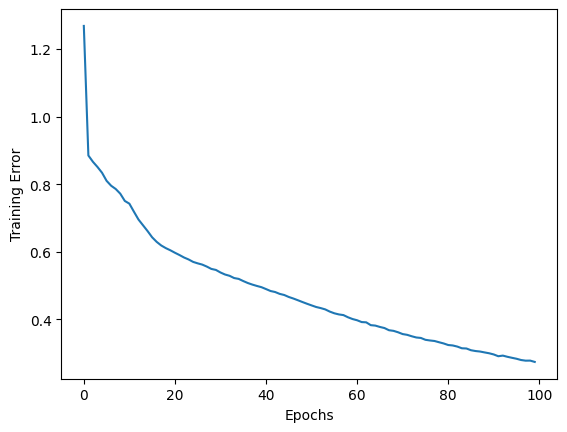

In [15]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

renumerated training user id to start index at 0 but think this will now not coencide with the test data so might have to change that

In [16]:
id_place = range(1,20)

# Creating dataset for making recommendations for the first user
tourism_data = np.array(list(set(train.Item_Id)))
tourism_data[:10]

id_user = 3
user = np.array([id_user for i in range(len(tourism_data))])
user[:10]

predictions = model.predict([user, tourism_data])

predictions = np.array([a[0] for a in predictions])

recommended_tourism_ids = (-predictions).argsort()[:10]

recommended_tourism_ids

# print predicted scores
predictions[recommended_tourism_ids]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


c:\Users\44747\anaconda3\envs\GroupAssignment2\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['User-Input', 'Item-Input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


array([5.802194 , 5.4158044, 5.2091756, 5.057314 , 5.0376897, 5.0341268,
       5.01162  , 4.986433 , 4.9782224, 4.964699 ], dtype=float32)